# Exploring data

In [130]:
import pandas as pd
import numpy as np
train = pd.read_csv('train.csv')
train_label = pd.read_csv('train_label.csv')
test = pd.read_csv('test.csv')
test_label = pd.read_csv('test_label.csv')


In [131]:
print(train.shape)
print(train_label.shape)
print(test.shape)
print(test_label.shape)

(8708, 9)
(8708, 1)
(2178, 9)
(2178, 1)


In [132]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012


In [133]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994


###### Adding the total_booking column to the train and test dataset

In [134]:
new_col_list=['Total_booking']

In [135]:
train_label_rename = train_label.set_axis(new_col_list, axis='columns', copy=True)
train_label_rename

,Total_booking
0,504
1,5
2,139
3,209
4,184
...,...
8703,13
8704,11
8705,1
8706,92


In [136]:
test_label_rename = test_label.set_axis(new_col_list, axis='columns', copy=True)
test_label_rename

,Total_booking
0,256
1,87
2,11
3,84
4,668
...,...
2173,3
2174,144
2175,159
2176,29


###### Division of the attributes

In [137]:
from datetime import datetime
import calendar
from scipy import stats

In [138]:
train['date']= train.datetime.apply(lambda x : x.split()[0])
train['hour']= train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["weekday"]= train.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y").weekday()])
train["month"]= train.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y").month])

test['date']= test.datetime.apply(lambda x : x.split()[0])
test['hour']= test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["weekday"]= test.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y").weekday()])
test["month"]= test.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y").month])

In [139]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,weekday,month
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,5/2/2012,19,Wednesday,May
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,9/5/2012,4,Wednesday,September
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,1/13/2011,9,Thursday,January
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,11/18/2011,16,Friday,November
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,9/13/2011,13,Tuesday,September


In [140]:
train_append=pd.concat([train,train_label_rename],axis=1, ignore_index=False)
train_append

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,weekday,month,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,5/2/2012,19,Wednesday,May,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,9/5/2012,4,Wednesday,September,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,1/13/2011,9,Thursday,January,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,11/18/2011,16,Friday,November,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,9/13/2011,13,Tuesday,September,184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,1/16/2012 6:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,1/16/2012,6,Monday,January,13
8704,11/10/2011 1:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11/10/2011,1,Thursday,November,11
8705,4/12/2011 3:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,4/12/2011,3,Tuesday,April,1
8706,11/7/2012 1:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,11/7/2012,1,Wednesday,November,92


In [141]:
train_append.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,weekday,month,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,5/2/2012,19,Wednesday,May,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,9/5/2012,4,Wednesday,September,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,1/13/2011,9,Thursday,January,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,11/18/2011,16,Friday,November,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,9/13/2011,13,Tuesday,September,184


In [142]:
test_append=pd.concat([test,test_label_rename],axis=1, ignore_index=False)
test_append

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,weekday,month,Total_booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,5/10/2012,11,Thursday,May,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,6/9/2012,7,Saturday,June,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,3/6/2011,20,Sunday,March,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,10/13/2011,11,Thursday,October,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,6/2/2012,12,Saturday,June,668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,3/8/2012 3:00,Spring,0,1,Clear + Few clouds,18.86,22.725,63,26.0027,3/8/2012,3,Thursday,March,3
2174,1/12/2012 12:00,Spring,0,1,Mist + Cloudy,13.94,17.425,81,7.0015,1/12/2012,12,Thursday,January,144
2175,3/7/2012 22:00,Spring,0,1,Clear + Few clouds,18.86,22.725,59,19.9995,3/7/2012,22,Wednesday,March,159
2176,5/12/2011 5:00,Summer,0,1,Clear + Few clouds,17.22,21.210,94,8.9981,5/12/2011,5,Thursday,May,29


In [143]:
test_append.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,weekday,month,Total_booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,5/10/2012,11,Thursday,May,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,6/9/2012,7,Saturday,June,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,3/6/2011,20,Sunday,March,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,10/13/2011,11,Thursday,October,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,6/2/2012,12,Saturday,June,668


In [144]:
train_append.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,Total_booking
count,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000,8708.000000
mean,0.028480,0.680294,20.243020,23.655552,61.649173,12.843891,193.007005
std,0.166348,0.466389,7.813494,8.501107,19.199578,8.190314,181.552211
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665000,46.000000,7.001500,43.000000
50%,0.000000,1.000000,20.500000,24.240000,61.000000,12.998000,148.000000
75%,0.000000,1.000000,26.240000,31.060000,77.000000,16.997900,286.000000
max,1.000000,1.000000,41.000000,45.455000,100.000000,56.996900,977.000000


<Axes: >

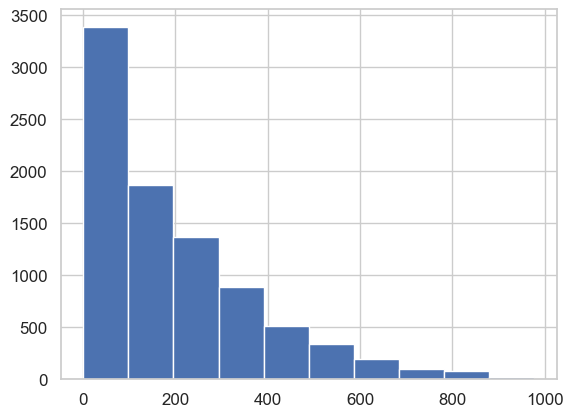

In [145]:
import matplotlib.pyplot as plt 

train_append.Total_booking.hist()

In [146]:
rev_stat=train_append.Total_booking.describe()
print(rev_stat)
# calculating interquartile range
iqr=rev_stat['75%']-rev_stat['25%']
upper=rev_stat['75%']+1.5*iqr
lower=rev_stat['25%']-1.5*iqr
print('iqr=',iqr)
print('The upper and lower bounds for suspected outliers are {} and {}'.format(lower,upper))

count    8708.000000
mean      193.007005
std       181.552211
min         1.000000
25%        43.000000
50%       148.000000
75%       286.000000
max       977.000000
Name: Total_booking, dtype: float64
iqr= 243.0
The upper and lower bounds for suspected outliers are -321.5 and 650.5


## Cleaning the data

##### Outliers analysis

In [147]:
outliers=train_append[train_append.Total_booking>upper].index.tolist()
train_append[train_append.Total_booking>upper]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,hour,weekday,month,Total_booking
5,8/17/2012 17:00,Fall,0,1,Clear + Few clouds,33.62,12.120,36,22.0028,8/17/2012,17,Friday,August,791
27,5/2/2012 18:00,Summer,0,1,Clear + Few clouds,22.96,26.515,73,15.0013,5/2/2012,18,Wednesday,May,813
30,7/10/2012 17:00,Fall,0,1,Clear + Few clouds,31.98,35.605,49,12.9980,7/10/2012,17,Tuesday,July,872
52,6/5/2012 18:00,Summer,0,1,Clear + Few clouds,24.60,31.060,43,12.9980,6/5/2012,18,Tuesday,June,790
70,5/18/2012 18:00,Summer,0,1,Clear + Few clouds,26.24,31.060,38,15.0013,5/18/2012,18,Friday,May,669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8478,3/14/2012 8:00,Spring,0,1,Clear + Few clouds,18.04,21.970,82,0.0000,3/14/2012,8,Wednesday,March,662
8582,10/15/2012 8:00,Winter,0,1,Mist + Cloudy,24.60,30.305,64,26.0027,10/15/2012,8,Monday,October,737
8676,5/12/2012 13:00,Summer,0,0,Clear + Few clouds,26.24,31.060,36,12.9980,5/12/2012,13,Saturday,May,659
8681,8/8/2012 17:00,Fall,0,1,Mist + Cloudy,32.80,37.880,55,19.0012,8/8/2012,17,Wednesday,August,858


In [148]:
train_append.shape

(8708, 14)

In [149]:

for index in outliers:
    train_append.drop(index,inplace=True)

In [150]:
train_append.shape

(8466, 14)

##### Null values analysis

In [151]:
train_append.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
date             0
hour             0
weekday          0
month            0
Total_booking    0
dtype: int64

## Analysis of data

<Axes: xlabel='weather', ylabel='Total_booking'>

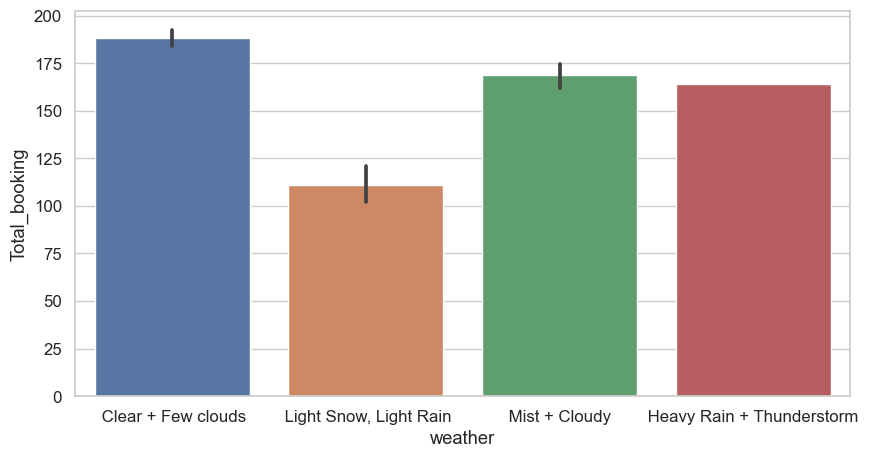

In [152]:

import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(x = 'weather', y = 'Total_booking', data = train_append)

<Axes: xlabel='season', ylabel='Total_booking'>

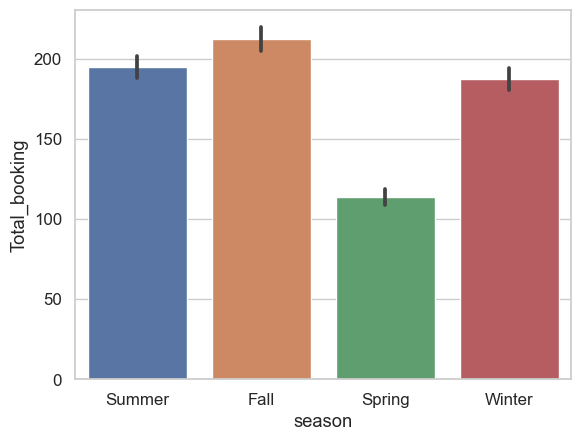

In [153]:
sns.barplot(x = 'season', y = 'Total_booking', data = train_append)

<Axes: xlabel='month', ylabel='Total_booking'>

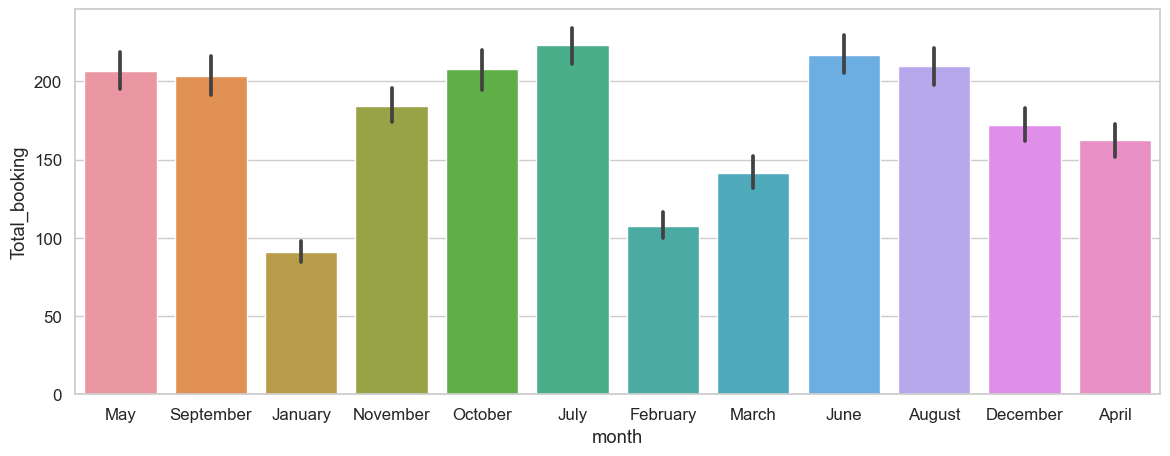

In [154]:
plt.figure(figsize=(14,5))
sns.barplot(x = 'month', y = 'Total_booking', data = train_append)

<Axes: xlabel='weekday', ylabel='Total_booking'>

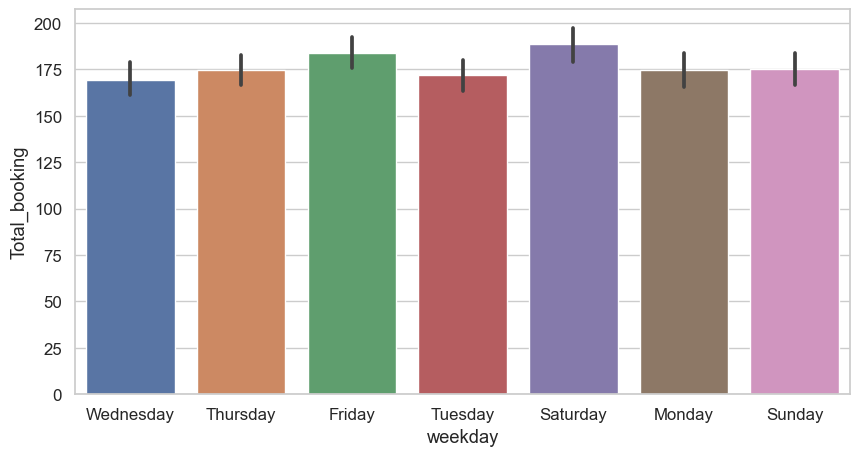

In [155]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'weekday', y = 'Total_booking', data = train_append)

<Axes: xlabel='hour', ylabel='Total_booking'>

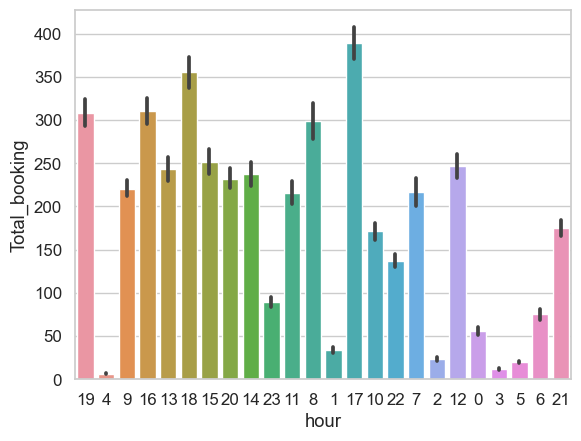

In [156]:
sns.barplot(x = 'hour', y = 'Total_booking', data = train_append)

Text(0.5, 1.0, 'correlation between features')

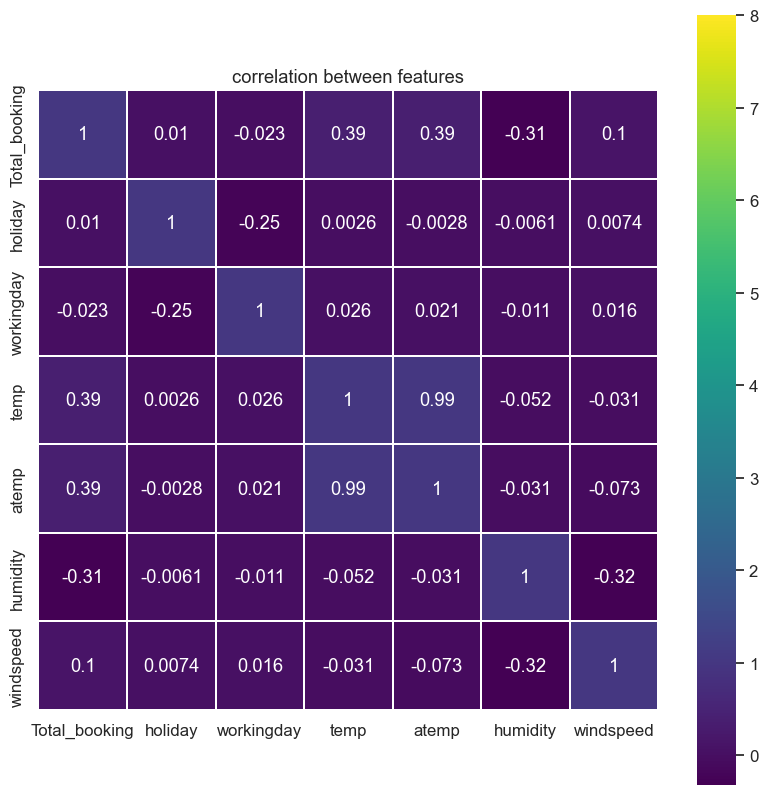

In [157]:
corrMatrix=train_append[["Total_booking","holiday","workingday","temp","atemp","humidity","windspeed"]].corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix, vmax=8, linewidth=0.01,square=True,annot=True, cmap='viridis',linecolor="white")
plt.title('correlation between features')


<Axes: xlabel='windspeed', ylabel='temp'>

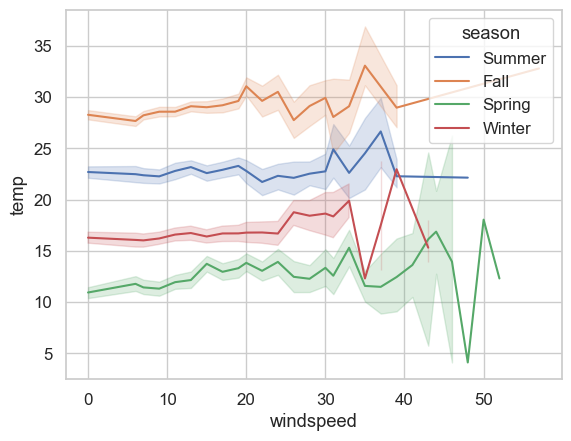

In [158]:
sns.set_style('whitegrid')
sns.lineplot(x='windspeed',y='temp',data=train_append,hue='season')

<Axes: xlabel='hour', ylabel='weekday'>

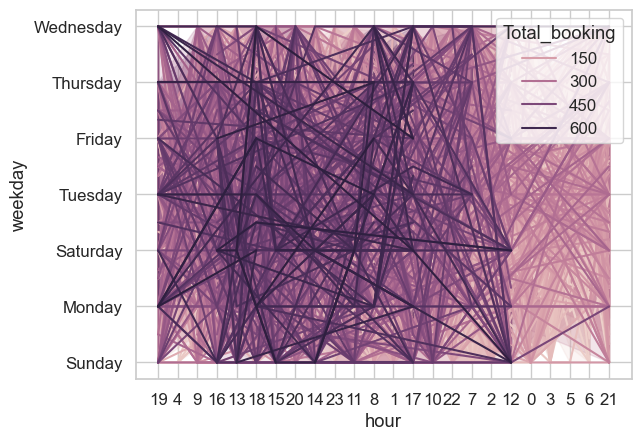

In [159]:
sns.set_style('whitegrid')
sns.lineplot(x='hour',y='weekday',data=train_append,hue='Total_booking')

<Axes: xlabel='weekday', ylabel='Total_booking'>

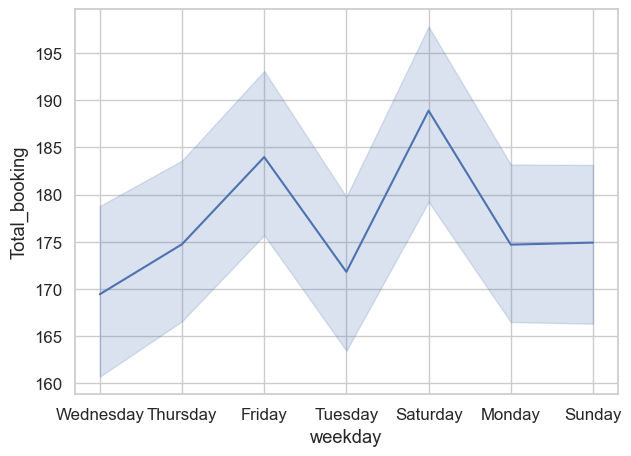

In [160]:
plt.figure(figsize=(7,5))
sns.lineplot(x='weekday',y='Total_booking',data=train_append)

<Axes: xlabel='hour', ylabel='Total_booking'>

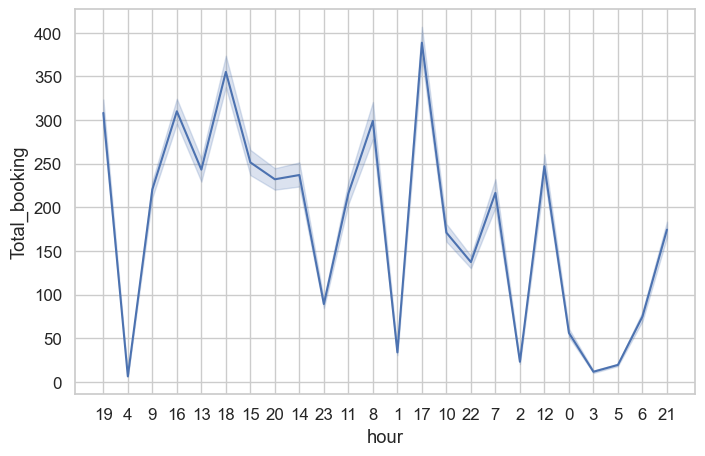

In [161]:
plt.figure(figsize=(8,5))
sns.lineplot(x='hour',y='Total_booking',data=train_append)

<Axes: xlabel='season', ylabel='Total_booking'>

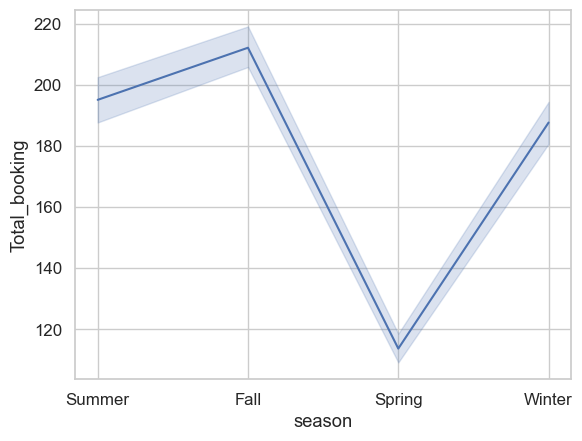

In [162]:
sns.lineplot(x='season',y='Total_booking',data=train_append)

<Axes: xlabel='weather', ylabel='Total_booking'>

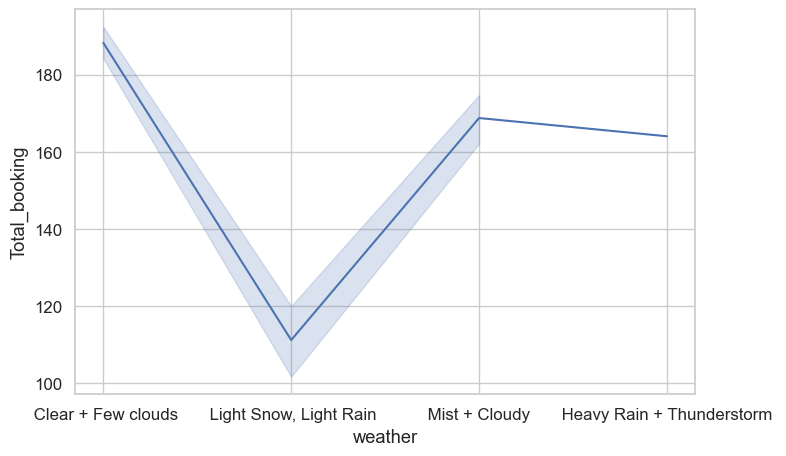

In [128]:
plt.figure(figsize=(8,5))
sns.lineplot(x='weather',y='Total_booking',data=train_append)

<Axes: xlabel='month', ylabel='Total_booking'>

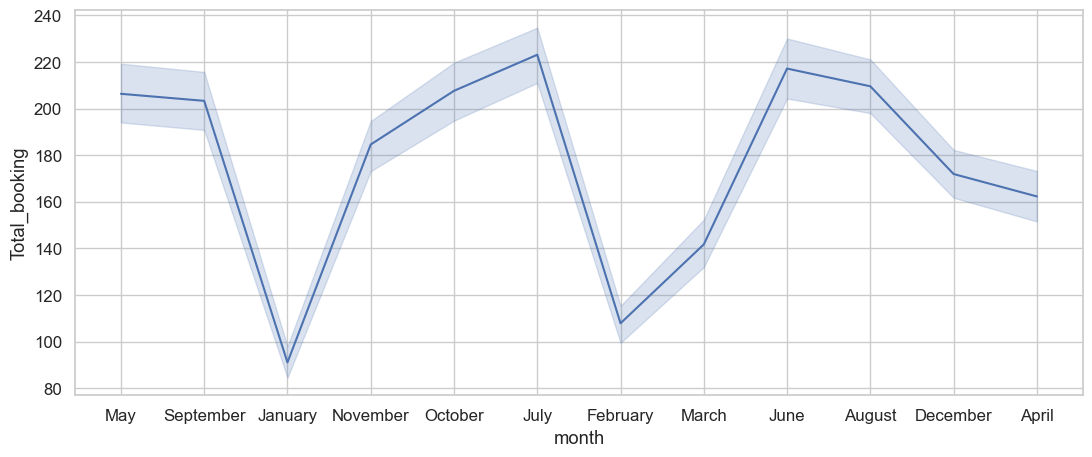

In [129]:
plt.figure(figsize=(13,5))
sns.lineplot(x='month',y='Total_booking',data=train_append)